In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime,timedelta





In [2]:
figure_dir='./figures/'
data_dir = './data_kantar/'
os.listdir(data_dir)

['Datos_2018.csv',
 'Datos_2019.csv',
 '2022_shops.dta',
 'Datos_2022.csv',
 'Datos_2021.csv',
 '2022_raw_1000-1500.dta',
 'trial.dta',
 'Datos_2020.csv',
 '2022_raw_1500-inf.csv',
 '2022_raw_1-20.csv',
 'retyped.xlsx',
 'Explicacion_VariablesV3.xlsx',
 '2022_o_20-100.dta',
 'Explicacion_VariablesV2.xlsx',
 '2017 data.csv',
 '2016 data.csv',
 '2022_raw_100-1000.csv',
 'sample.csv',
 '2022_raw_20-100.csv',
 '2022_products.csv',
 '2022_customers.csv',
 'Explicacion_VariablesV3.numbers',
 '2022_purchases.csv',
 'eng_re_typed.csv',
 '2022_o_1500-inf.dta',
 'Carrefour_2019_2020_2021_prepared2_02_11_2023.dta',
 '2022_raw_1000-1500.csv',
 '2022_raw_100-1500.dta',
 '2022_shops.csv',
 '2022_o_100-1500.dta',
 '2022_raw_100-1000.dta',
 're_typed.csv',
 '2022_raw_20-100.dta',
 '2022_products.dta',
 '2014 data.csv',
 '2015 data.csv',
 '2022_customers.dta',
 'OneDrive_1_12-5-2023.zip',
 '2022_purchases.dta',
 '2022_raw_1500-inf.dta',
 '2022_raw_1-20.dta',
 '2022_o_1-20.dta']

In [4]:
year=2022

In [36]:

df_test = pd.read_stata(data_dir+f'{year}_purchases.dta') 

In [37]:
df_test.dtypes

index                      int32
idCompra                   int32
CodPanelista               int32
CodProducto                int32
FechaCesta        datetime64[ns]
PrecioCompra               int32
Cantidad                   int32
Precio                     int32
CodLugarCompra             int32
TipoMaquina             category
Promo_Folleto               int8
Promo_Envase                int8
Promo_TPR                   int8
promo                       int8
dtype: object

In [38]:
df_test['CodLugarCompra'].unique()

array([ 79,  28,  33, 121, 123, 124, 127, 128, 131, 134, 136, 137, 139,
       140, 145, 154, 155, 171, 193, 991,   5, 120, 192,   2,   3,  30,
        68, 102, 108, 130, 135, 150, 164, 166, 217, 252, 333,   6,  50,
        51,  57,  69, 113, 119, 125, 126, 132, 149, 153, 167, 214, 215,
       246, 249, 339, 901,  43, 265, 280, 256, 325, 990, 258, 343, 603,
       648, 900, 902,   7,  46,  65, 143, 147, 168, 197, 225, 247, 324,
         1,  49, 248, 201, 255, 300, 528, 169,  73, 152, 527,  67, 260,
       547, 203, 600, 133, 347, 327, 138, 151,  71, 114, 301, 244, 129,
       236, 237, 289,  58, 148, 172, 220, 454, 288, 331, 240, 400, 402,
       320, 281, 564, 253, 312, 222, 647,  19, 322, 146, 238, 536, 195,
       604, 179, 122, 353,  15, 174, 351, 370, 540, 645,  20, 602, 142,
       211, 239,  21,  60, 444, 291, 512, 210, 621,  37, 218, 275,  91,
        34, 561, 242, 243, 302, 385, 411, 539, 296, 599,  24, 554, 468,
       538, 606, 421, 250, 144, 346,   9, 344, 157, 531, 345, 27

In [5]:
df_test_shops = pd.read_stata(data_dir+f'{year}_shops.dta') 


In [6]:
df_test_products = pd.read_stata(data_dir+f'{year}_products.dta') 


In [40]:
df_test_shops.columns

Index(['index', 'CodLugarCompra', 'Lugar_Compra', 'Canal'], dtype='object')

In [41]:
df_test=df_test.merge(df_test_shops[['CodLugarCompra','Lugar_Compra','Canal']])

print(df_test['Lugar_Compra'].cat.categories)


Index(['AGRIGEL', 'AHORRAMAS', 'ALCAMPO', 'ALCAMPO INTERNET',
       'ALCAMPO PARAFARMACIA', 'ALCOSTO', 'ALDI', 'ALIMERKA', 'ALTEZA',
       'AMAZON FRESH',
       ...
       'Veterinaria Por Internet',
       'Vidal Supermercados                               ', 'Vips',
       'Vips Por Internet',
       'Women Secret                                      ',
       'YVES ROCHER CATÁLOGO', 'YVES ROCHER TIENDA',
       'Yedra                                             ', 'ZARA',
       'Zooplus                                           '],
      dtype='object', length=376)


In [42]:
df_test['Canal'].unique()

['SUPER+AUTOS', 'DISCOUNT', 'TDA.DE ALIMENTACION', 'OTROS CANALES', 'CARNICERIA/POLLERIA', ..., 'CANAL CONVENIENCIA', 'CADENAS PERFUMERIA', 'INTERNET', 'GRANDES ALMACENES', 'FARMACIA+PARAFARMACIA']
Length: 26
Categories (26, object): ['AUTOCONSUMO' < 'CADENAS PERFUMERIA' < 'CANAL CONVENIENCIA' < 'CARNICERIA/POLLERIA' ... 'TDA.DE ALIMENTACION' < 'TDAS.CONGELADOS' < 'TODO A 100/060' < 'VTA.DOMICILIO+CATALOGO']

In [43]:
df_test.head(10)

,index,idCompra,CodPanelista,CodProducto,FechaCesta,PrecioCompra,Cantidad,Precio,CodLugarCompra,TipoMaquina,Promo_Folleto,Promo_Envase,Promo_TPR,promo,Lugar_Compra,Canal
0,0,191945938,364917,791031,2022-12-12,1650,12000,1716,79,PDT / Beauty Smart,0,0,0,0,Mercadona,SUPER+AUTOS
1,132,193026443,30109,204305,2022-12-29,10719,876,122,79,Smartphone,0,0,0,0,Mercadona,SUPER+AUTOS
2,133,187072582,30109,290268,2022-05-28,2420,1000,229,79,Smartphone,0,0,0,0,Mercadona,SUPER+AUTOS
3,134,191782479,30109,290268,2022-11-26,12718,1000,199,79,Smartphone,0,0,0,0,Mercadona,SUPER+AUTOS
4,135,190676039,30109,290307,2022-11-03,6382,2000,318,79,Smartphone,0,0,0,0,Mercadona,SUPER+AUTOS
5,136,186944357,30109,290343,2022-05-28,2420,1596,334,79,Smartphone,0,0,0,0,Mercadona,SUPER+AUTOS
6,137,187421348,30109,290343,2022-07-13,9585,4050,401,79,Smartphone,0,0,0,0,Mercadona,SUPER+AUTOS
7,138,193279289,30109,290364,2022-12-29,10719,2414,505,79,Smartphone,0,0,0,0,Mercadona,SUPER+AUTOS
8,139,190377610,30109,290364,2022-11-03,6382,1555,294,79,Smartphone,0,0,0,0,Mercadona,SUPER+AUTOS
9,140,190687989,30109,50740,2022-11-03,6382,1000,125,79,Smartphone,0,0,0,0,Mercadona,SUPER+AUTOS


In [44]:
place_and_product_df = df_test[['CodLugarCompra','CodProducto']].drop_duplicates()

In [45]:
place_and_product_df

,CodLugarCompra,CodProducto
0,79,791031
1,79,204305
2,79,290268
4,79,290307
5,79,290343
...,...,...
7584152,628,268541
7584153,628,575700
7584154,628,915099
7584155,628,665583


In [46]:
df_test.groupby(['CodLugarCompra','CodProducto']).size()

CodLugarCompra  CodProducto
1               10             1
                569            1
                833            2
                1005           1
                1193           1
                              ..
999             309809         1
                476357         1
                670806         1
                686403         1
                845909         1
Length: 622991, dtype: int64

In [48]:
# some product and place combinations occur very rarely - so cannot do outlier detection based on these 
# what about canal
df_test.promo.value_counts()

0    6908404
1     675753
Name: promo, dtype: int64

In [47]:
canal_product_groups_counts=df_test.groupby(['Canal','CodProducto','promo']).size()


In [49]:
# dropping product, channel combinations with no transaction
canal_product_groups_counts=canal_product_groups_counts[canal_product_groups_counts.ge(1)]

In [50]:
transaction_limits=[1,20,100,1500,np.inf]

In [51]:
intervals= list(zip(transaction_limits[:-1], transaction_limits[1:]))

In [52]:
for t in intervals:
    print(t[0],t[1])

1 20
20 100
100 1500
1500 inf


In [53]:
    
ge = canal_product_groups_counts[canal_product_groups_counts.ge(intervals[1][0])]
ii= ge[ge.lt(intervals[1][1])]
ii.head()

Canal        CodProducto  promo
AUTOCONSUMO  204225       0        24
             204228       0        85
             204257       0        23
             204258       0        41
             204259       0        99
dtype: int64

In [ ]:
b = pd.DataFrame(ii)
b.index

In [ ]:
b.sum()

In [ ]:
b.reset_index()

In [54]:

dfs={}
for t in intervals:
    a = canal_product_groups_counts[canal_product_groups_counts.ge(t[0]).lt(t[1])]
    ge = canal_product_groups_counts[canal_product_groups_counts.ge(t[0])]
    ii= ge[ge.lt(t[1])]
    print(ii.size)
    b = pd.DataFrame(ii)
    print(b.shape[0])
    print(b.sum())
    #name=f'{year}_freq_{t[0]}_{t[1]}.dta'
    dfs[(t[0],t[1])]=df_test.merge(b.reset_index())
    print(dfs[(t[0],t[1])].shape[0])


332759
332759
0    1242788
dtype: int64
1242788
37448
37448
0    1562318
dtype: int64
1562318
11848
11848
0    3540632
dtype: int64
3540632
434
434
0    1238419
dtype: int64
1238419


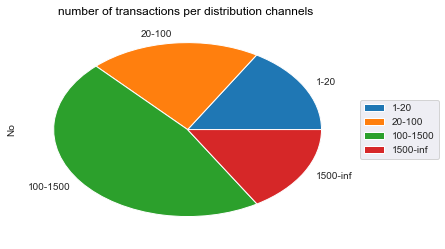

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
counts=[dfs[(t[0],t[1])].shape[0] for t in intervals]
names=[f'{t[0]}-{t[1]}' for t in intervals]

df = pd.DataFrame({'No': counts},
                  index=names)
f = plt.figure()

plt.title('number of transactions per distribution channels \n (number of sales of a given CodProducto in a given channels ) ', color='black')
df.plot(kind='pie',y="No", ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig(figure_dir+f'{year}_transaction_counts.png')
plt.show()
#plot = df.plot.pie(y='No', figsize=(5, 5)).legend(loc='best')

In [13]:
year=2022

def get_name(year,state,interval):
    return f'{year}_{state}_{interval[0]}-{interval[1]}.dta'

get_name(year,'raw',t)

'2022_raw_1500-inf.dta'

In [57]:
# saving the group of transaction (based on per channel transaction counts) into different files
[dfs[(t[0],t[1])].to_stata(data_dir+get_name(year,'raw',t)) for t in intervals]

/Users/peterkiss/anaconda3/envs/kantar_data_env/lib/python3.7/site-packages/pandas/io/stata.py:2398: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    0   ->   _0

If this is not what you expect, please make sure you have Stata-compliant
column names in your DataFrame (strings only, max 32 characters, only
alphanumerics and underscores, no Stata reserved words)

  warnings.warn(ws, InvalidColumnName)


[None, None, None, None]

In [58]:
for t in intervals[:-1]:
    del dfs[(t[0],t[1])]

In [59]:
t=intervals[-1]
t

(1500, inf)

In [60]:
dfs.keys()

dict_keys([(1500, inf)])

In [61]:
dfs={}
dfs[t]=pd.read_stata(data_dir+get_name(year,'raw',t))

In [27]:
dfs[t]

,level_0,index,idCompra,CodPanelista,CodProducto,CodigoBarras,FechaCesta,PrecioCompra,Cantidad,Precio,CodLugarCompra,Lugar_Compra,Canal,CodIndividuo,Provincia,Region,promo_folleto,promo_envase,promo,_0
0,0,2,182162741,30109,204305,SSA1410202,2022-01-20,2088,445,56,33,DIA,DISCOUNT,0,Jaen,Andalucia,NaN,NaN,0,6543
1,1,3,189827808,30109,204305,SSA1410202,2022-10-09,1071,625,87,33,DIA,DISCOUNT,0,Jaen,Andalucia,NaN,NaN,0,6543
2,2,4,182203652,30109,204305,SSA1410202,2022-01-12,969,935,83,33,DIA,DISCOUNT,0,Jaen,Andalucia,NaN,NaN,0,6543
3,3,5,183238787,30109,204305,SSA1410202,2022-02-25,2262,1185,117,33,DIA,DISCOUNT,0,Jaen,Andalucia,NaN,NaN,0,6543
4,4,15386,187347423,30628,204305,SSA1410202,2022-07-06,5852,1644,206,68,LIDL,DISCOUNT,0,Pontevedra,Noroeste,NaN,NaN,0,6543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238414,1238414,7583066,182748278,439823,797223,8480000614216,2022-01-28,400,1000,105,79,Mercadona,SUPER+AUTOS,0,Valencia,Levante,NaN,NaN,0,1667
1238415,1238415,7583067,183776892,439823,797223,8480000614216,2022-03-17,6500,1000,115,79,Mercadona,SUPER+AUTOS,0,Valencia,Levante,NaN,NaN,0,1667
1238416,1238416,7583068,185163402,439823,797223,8480000614216,2022-04-13,8500,1000,105,79,Mercadona,SUPER+AUTOS,0,Valencia,Levante,NaN,NaN,0,1667
1238417,1238417,7583069,183579421,439823,797223,8480000614216,2022-02-14,5500,1000,115,79,Mercadona,SUPER+AUTOS,0,Valencia,Levante,NaN,NaN,0,1667


In [62]:
first_line=dfs[(t[0],t[1])].iloc[0]
first_line[['CodProducto','Canal','promo']]

CodProducto         204305
Canal          SUPER+AUTOS
promo                    0
Name: 0, dtype: object

In [63]:
df= dfs[(t[0],t[1])]
place_and_product_df = df[['CodProducto','Canal','promo']].drop_duplicates()
place_and_product_df

,CodProducto,Canal,promo
0,204305,SUPER+AUTOS,0
15488,290343,SUPER+AUTOS,0
18138,290364,SUPER+AUTOS,0
24979,79712,SUPER+AUTOS,0
26698,456375,SUPER+AUTOS,0
...,...,...,...
1228540,889423,HIPER,0
1230398,920171,HIPER,0
1232406,814078,HIPER,0
1234324,415555,AUTOCONSUMO,0


In [64]:
place_and_product_df.iloc[[0]]

,CodProducto,Canal,promo
0,204305,SUPER+AUTOS,0


In [31]:
place_and_product_df.index

Int64Index([      0,    6543,    8948,   11529,   27017,   29667,   36508,
              38227,   39798,   44958,
            ...
            1220334, 1221898, 1224186, 1225832, 1227352, 1229080, 1230767,
            1232866, 1234628, 1236752],
           dtype='int64', length=434)

In [66]:
# we will do first single product and channel outlier detection
setup_df= place_and_product_df.iloc[[0]]

In [67]:
# keeping the interesting rows only
single_product_sales_df=df.merge(setup_df)

In [68]:
single_product_sales_df.columns

Index(['level_0', 'index', 'idCompra', 'CodPanelista', 'CodProducto',
       'FechaCesta', 'PrecioCompra', 'Cantidad', 'Precio', 'CodLugarCompra',
       'TipoMaquina', 'Promo_Folleto', 'Promo_Envase', 'Promo_TPR', 'promo',
       'Lugar_Compra', 'Canal', '_0'],
      dtype='object')

In [69]:
# computing average price per unit 
single_product_sales_df['price_per_unit']= single_product_sales_df['Precio']/single_product_sales_df['Cantidad']
single_product_sales_df.dtypes


level_0                    int32
index                      int32
idCompra                   int32
CodPanelista               int32
CodProducto                int32
FechaCesta        datetime64[ns]
PrecioCompra               int32
Cantidad                   int32
Precio                     int32
CodLugarCompra             int32
TipoMaquina             category
Promo_Folleto               int8
Promo_Envase                int8
Promo_TPR                   int8
promo                       int8
Lugar_Compra            category
Canal                   category
_0                         int32
price_per_unit           float64
dtype: object

In [70]:


import matplotlib.pyplot as plt

'''
marker_size=1
fig, ax = plt.subplots(figsize=(10,6))
#most_frequent_o_data.plot.scatter(x='t', y='price_per_unit' ,c='out', cmap='RdBu_r',ax=ax)

ax.scatter(x=single_product_sales_df['FechaCesta'].astype(np.int64),y=single_product_sales_df['price_per_unit'],color='blue',s=marker_size)
#ax.scatter(x=o['t'],y=o['price_per_unit'],color='red')
#plt.axvline(x = cut_dates, color = 'b', label = 'axvline - full height')
a=[datetime.fromtimestamp(ts / 1e9).strftime('%Y-%m-%d') for ts in ax.get_xticks()]
ax.set_xticklabels(a)
'''

"\nmarker_size=1\nfig, ax = plt.subplots(figsize=(10,6))\n#most_frequent_o_data.plot.scatter(x='t', y='price_per_unit' ,c='out', cmap='RdBu_r',ax=ax)\n\nax.scatter(x=single_product_sales_df['FechaCesta'].astype(np.int64),y=single_product_sales_df['price_per_unit'],color='blue',s=marker_size)\n#ax.scatter(x=o['t'],y=o['price_per_unit'],color='red')\n#plt.axvline(x = cut_dates, color = 'b', label = 'axvline - full height')\na=[datetime.fromtimestamp(ts / 1e9).strftime('%Y-%m-%d') for ts in ax.get_xticks()]\nax.set_xticklabels(a)\n"

In [71]:
# since there is a lot of transaction here, how many comes from the same shops
single_product_sales_df['CodLugarCompra'].value_counts()

79     11161
30       856
2        317
280      297
333      254
51       252
120      211
69       209
50       184
6        176
900      167
252      164
171      124
166      116
343      104
901      100
121       88
102       80
193       77
28        47
218       42
603       39
256       37
172       33
258       30
215       28
201       26
222       24
179       23
604       22
197       21
192       17
324       16
253       14
602       14
225       14
255       13
346       12
7         10
203        9
605        9
250        8
196        7
43         5
285        5
214        4
9          4
217        3
344        3
216        2
24         2
42         2
613        2
288        1
282        1
108        1
607        1
Name: CodLugarCompra, dtype: int64

In [72]:
# making datetime more fitting for regression

#https://stackoverflow.com/questions/13648774/get-year-month-or-day-from-numpy-datetime64

single_product_sales_df['t']=single_product_sales_df['FechaCesta'].astype('datetime64').dt.dayofyear




In [73]:
# function to get back actual date from the day of the year
def day_of_the_year_to_date(year, days):
    return datetime(year, 1, 1) + timedelta(int(days) - 1)

day_of_the_year_to_date(year,single_product_sales_df['CodLugarCompra'][0] )

datetime.datetime(2022, 3, 20, 0, 0)

In [74]:
single_product_sales_df['t'].head()

0    363
1    180
2    299
3     56
4    252
Name: t, dtype: int64

In [75]:
import seaborn as sns

In [76]:
#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style(rc = {'axes.facecolor': '#FFFFFF', 'figure.facecolor':'#FFFFFF'})

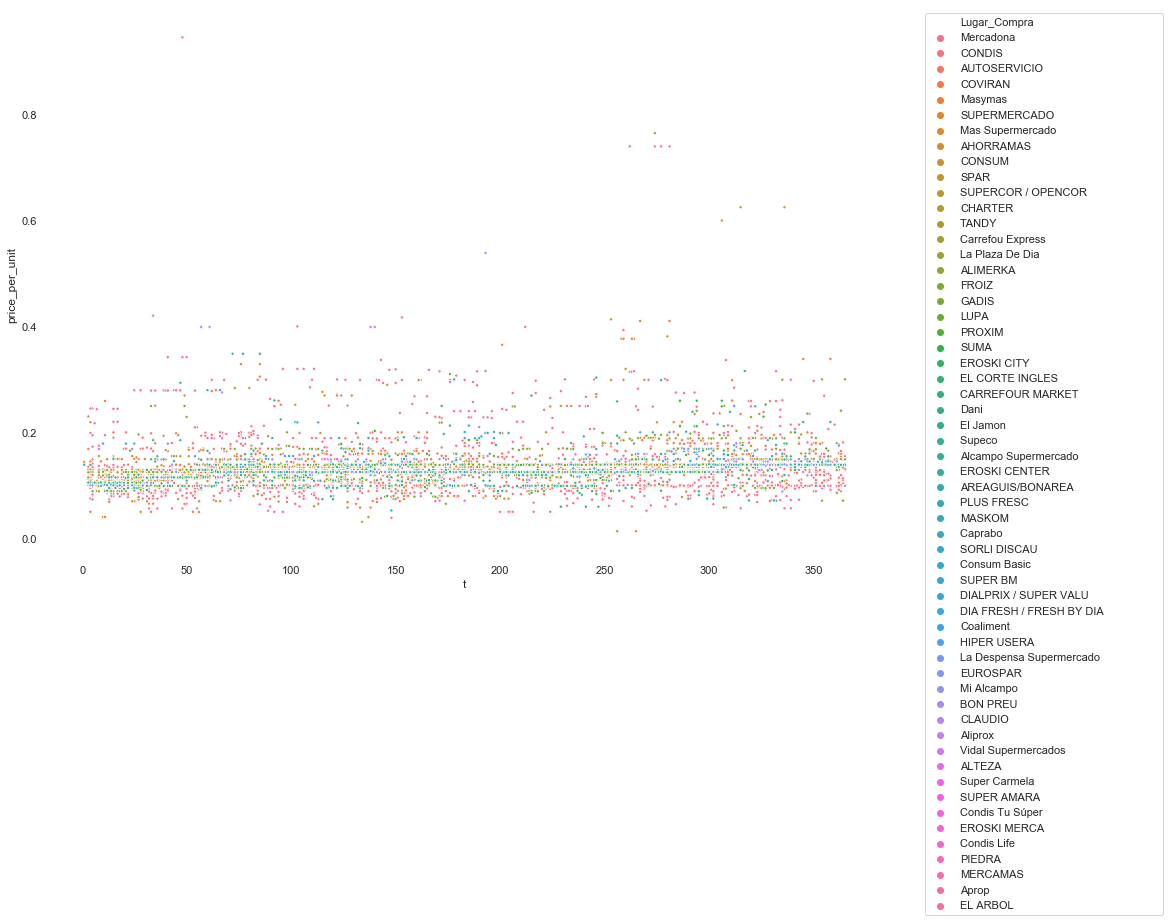

In [79]:

marker_size=10
ax = sns.scatterplot(data=single_product_sales_df, x="t", y="price_per_unit",hue='Lugar_Compra',s=marker_size)

#ax.set_xticklabels([datetime.fromtimestamp(ts / 1e9).strftime('%Y-%m-%d') for ts in ax.get_xticks()])
'''
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 2 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
'''
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(figure_dir)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
'''
def model(df, delta):
    y = df[['price_per_unit']].values
    X = df[['t']].values
    #model = 'act_hours ~ h_hours + I(h_hours**2)'
    #hours_model = smf.ols(formula = model, data = df)
    return np.squeeze(LinearRegression().fit(X, y).predict(X))

def group_predictions(df, date):
    date = pd.to_datetime(date)
    df.date = pd.to_datetime(df.date)

    day = np.timedelta64(1, 'D')
    mn = df.date.min()
    df['date_delta'] = df.date.sub(mn).div(day)

    dd = (date - mn) / day

    return df.groupby('group').apply(model, delta=dd)
'''

In [ ]:
#single_product_sales_df=single_product_sales_df.drop('predicted', axis=1)
#single_product_sales_df=single_product_sales_df.drop('something', axis=1)
#single_product_sales_df=single_product_sales_df.drop('outlier', axis=1)
single_product_sales_df=single_product_sales_df.drop('p', axis=1)

In [ ]:
#


#single_product_sales_df=single_product_sales_df.drop(('predicted','something'), axis=1)

single_product_sales_df.head()

In [8]:

# this is for  

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize

def model_linearr(df):
    y = df[['price_per_unit']].values
    X = df[['t']].values
    i=df[['price_per_unit']].index.copy()
    
    predicted= np.squeeze(LinearRegression().fit(X, y).predict(X))
    diff =np.squeeze(y)- np.squeeze(predicted)
    ret= pd.DataFrame(index=i, data=list(zip(predicted,diff)), columns=['1','2'])

    return ret

#https://www.analyticsvidhya.com/blog/2022/08/outliers-pruning-using-python/
def model_poly(df):
    Y = np.array(df['price_per_unit'])
    X = np.array(df['t'])
    #flag=np.zeros(y.size)
    idx=df[['price_per_unit']].index.copy()
    x=X.copy()
    y=Y.copy()
    print(x)
    for i in range(1):
        p = np.polyfit(x, y, deg=5)
        ps = np.polyval(p, x)
        diff = abs(y-ps)
        std=np.std(diff)
        mean=np.mean(diff)
        good =  abs(diff-mean)/std < 3 
        #good = abs(y - ps) < 1  # Here we will only remove positive outliers
            
        x_bad, y_bad = x[~good], y[~good]
        x, y = x[good], y[good]

   

        if (~good).sum() == 0:
            break
    ps = np.polyval(p, X)
    diff = abs(Y-ps)
    std=np.std(diff)
    mean=np.mean(diff)
    z= abs(diff-mean)/std
    good =  z < 3 
    flag = np.logical_not(good)
  
    ret= pd.DataFrame(index=idx, data=list(zip(ps, z,flag)), columns=['1','2','3'])

    return ret


In [ ]:
# https://stackoverflow.com/questions/39384749/groupby-pandas-incompatible-index-of-inserted-column-with-frame-index
single_product_sales_df['LC']=single_product_sales_df['Lugar_Compra'].astype(str)
single_product_sales_df[['predicted','z','outlier']]=single_product_sales_df.groupby('LC')[['t','price_per_unit']].apply(model_poly).reset_index().set_index('level_1').drop('LC',axis=1)

In [ ]:
single_product_sales_df.columns

In [ ]:
single_product_sales_df[['z','predicted','price_per_unit','outlier']].head()

In [87]:
cp=single_product_sales_df.iloc[0]['CodProducto']

In [88]:
prod_data=df_test_products.loc[df_test_products['CodProducto']==cp]

In [97]:
prod_name=prod_data.iloc[0]['VF']

In [98]:
prod_name

'FRUTA FRESCA A PESO (CB)'

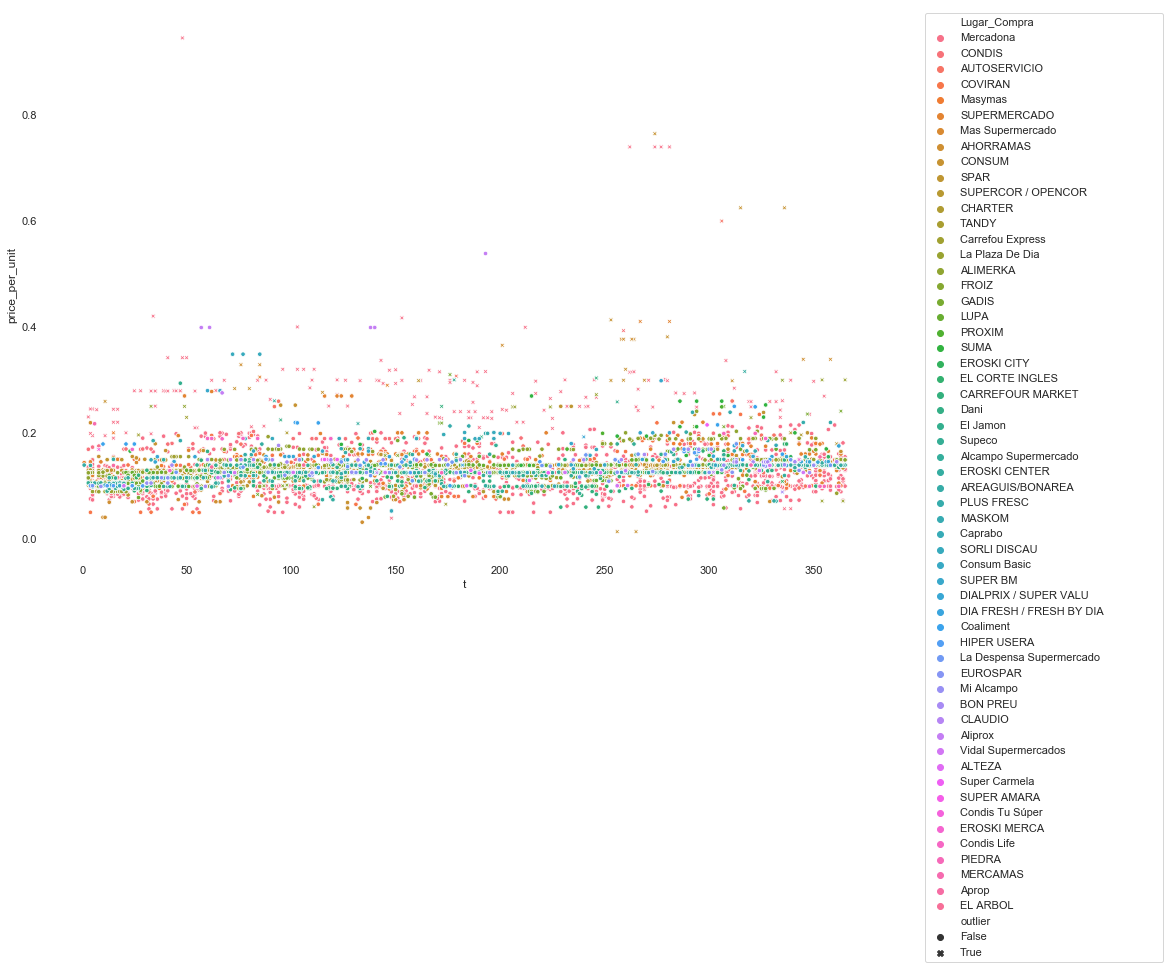

In [112]:
marker_size=20
ax = sns.scatterplot(data=single_product_sales_df, x="t", y="price_per_unit",hue='Lugar_Compra', style="outlier",s=marker_size)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(figure_dir+f'{prod_name}_prices_per_units_{year}_o_per_lc.png',bbox_inches='tight')


In [106]:
# since there are shops ("LugarCompra") with very few sales, we will stick with channel-level detection.
single_product_sales_df.head()

,level_0,index,idCompra,CodPanelista,CodProducto,FechaCesta,PrecioCompra,Cantidad,Precio,CodLugarCompra,...,promo,Lugar_Compra,Canal,_0,price_per_unit,t,LC,predicted,z,outlier
0,0,132,193026443,30109,204305,2022-12-29,10719,876,122,79,...,0,Mercadona,SUPER+AUTOS,15488,0.139269,363,Mercadona,0.138362,0.284702,False
1,1,5959,187264539,30221,204305,2022-06-29,10035,1642,205,79,...,0,Mercadona,SUPER+AUTOS,15488,0.124848,180,Mercadona,0.126140,0.268844,False
2,2,7792,190467081,30256,204305,2022-10-26,5831,750,104,79,...,0,Mercadona,SUPER+AUTOS,15488,0.138667,299,Mercadona,0.133271,0.099509,False
3,3,10939,183329126,30593,204305,2022-02-25,1762,1596,184,79,...,0,Mercadona,SUPER+AUTOS,15488,0.115288,56,Mercadona,0.121040,0.084801,False
4,4,10940,189238946,30593,204305,2022-09-09,8898,1284,161,79,...,0,Mercadona,SUPER+AUTOS,15488,0.125389,252,Mercadona,0.127215,0.246806,False


In [113]:
# hack for visualisation there should be only a single group..
single_product_sales_df[['predicted','z','outlier']]=single_product_sales_df.groupby('CodProducto')[['t','price_per_unit']].apply(model_poly).reset_index().set_index('level_1').drop('CodProducto',axis=1)

[363 180 299 ...  15  62 106]


In [273]:
single_product_sales_df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            987804, 987805, 987806, 987807, 987808, 987809, 987810, 987811,
            987812, 987813],
           dtype='int64', length=987814)

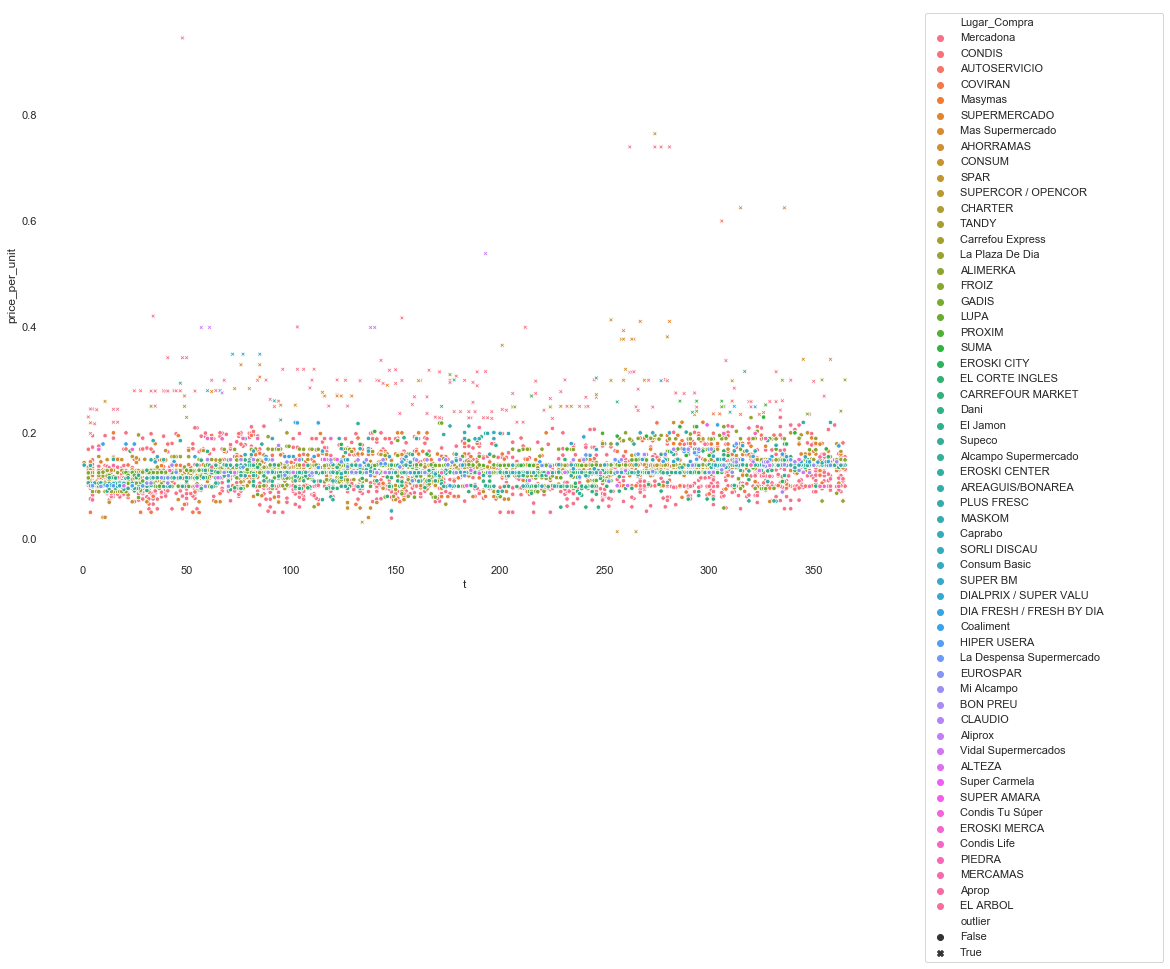

In [114]:
marker_size=20
ax = sns.scatterplot(data=single_product_sales_df, x="t", y="price_per_unit",hue='Lugar_Compra', style="outlier",s=marker_size)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(figure_dir+f'{prod_name}_prices_per_units_{year}_o_per_c.png',bbox_inches='tight')

# do the same thing for 100-1500 and 20-100

In [127]:
t=intervals[-3]

In [128]:
t

(20, 100)

In [129]:

dfs[t]=pd.read_stata(data_dir+get_name(year,'raw',t))

In [130]:
first_line=dfs[(t[0],t[1])].iloc[0]
first_line[['CodProducto','Canal','promo']]

CodProducto         330754
Canal          SUPER+AUTOS
promo                    0
Name: 0, dtype: object

In [131]:
df= dfs[(t[0],t[1])]
place_and_product_df = df[['CodProducto','Canal','promo']].drop_duplicates()
place_and_product_df

,CodProducto,Canal,promo
0,330754,SUPER+AUTOS,0
43,273217,SUPER+AUTOS,0
90,392205,SUPER+AUTOS,0
149,8388,SUPER+AUTOS,0
178,348,SUPER+AUTOS,0
...,...,...,...
1562189,649021,INTERNET,0
1562214,839177,INTERNET,0
1562236,8407,DIET/MACROB/HERB.,0
1562261,850367,INTERNET,0


In [132]:
# we will do first single product and channel outlier detection
setup_df = place_and_product_df.iloc[[0]]
# keeping the interesting rows only
single_product_sales_df = df.merge(setup_df)
single_product_sales_df.columns

Index(['level_0', 'index', 'idCompra', 'CodPanelista', 'CodProducto',
       'FechaCesta', 'PrecioCompra', 'Cantidad', 'Precio', 'CodLugarCompra',
       'TipoMaquina', 'Promo_Folleto', 'Promo_Envase', 'Promo_TPR', 'promo',
       'Lugar_Compra', 'Canal', '_0'],
      dtype='object')

In [133]:
# computing average price per unit 
single_product_sales_df['price_per_unit']= single_product_sales_df['Precio']/single_product_sales_df['Cantidad']


In [134]:
single_product_sales_df['t']=single_product_sales_df['FechaCesta'].astype('datetime64').dt.dayofyear


In [135]:
single_product_sales_df[['predicted','z','outlier']]=single_product_sales_df.groupby('CodProducto')[['t','price_per_unit']].apply(model_poly).reset_index().set_index('level_1').drop('CodProducto',axis=1)

[330 209 329 293 214 267 334 300 242 238 284 288 304 301 251 259 304 252
 225 220 329 216 218 338 281 309 295 308 353 217 203 230 200 211 284 226
 313 244 312 327 279 201 253]


In [138]:
cp = single_product_sales_df.iloc[0]['CodProducto']
prod_data = df_test_products.loc[df_test_products['CodProducto'] == cp]
prod_name = prod_data.iloc[0]['VF']
prod_name = prod_name.replace('/','_')

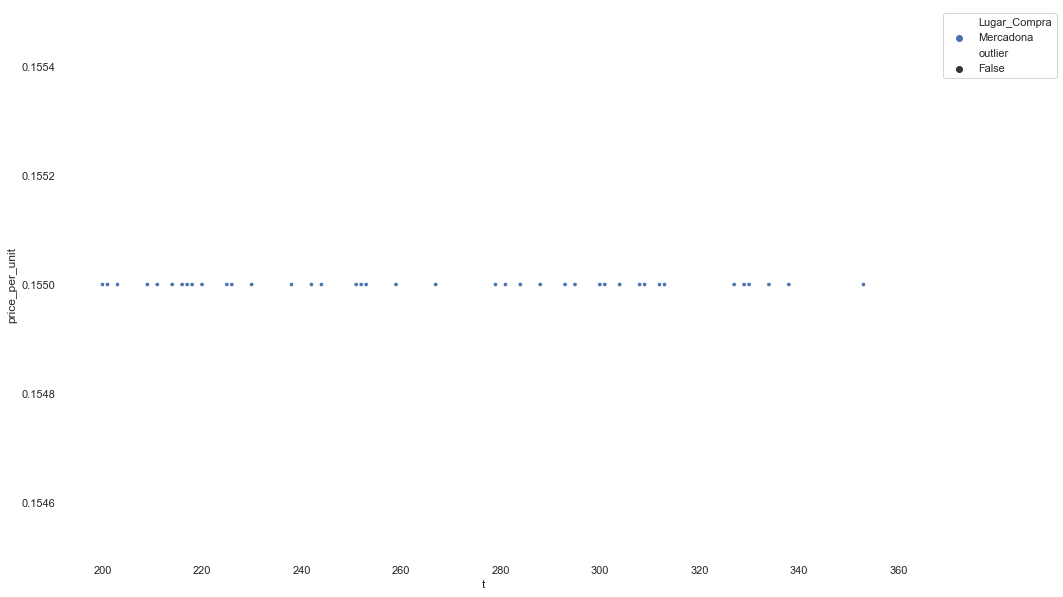

In [139]:
marker_size=20
ax = sns.scatterplot(data=single_product_sales_df, x="t", y="price_per_unit",hue='Lugar_Compra', style="outlier",s=marker_size)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(figure_dir+f'{prod_name}_prices_per_units_{year}_o_per_c.png',bbox_inches='tight')

# for very few sales

In [140]:
t=intervals[0]

dfs[t] = pd.read_stata(data_dir + get_name(year, 'raw', t))
first_line = dfs[(t[0], t[1])].iloc[0]
df= dfs[(t[0],t[1])]



In [197]:
place_and_product_df = df[['CodProducto','Canal','promo']].drop_duplicates()
# we will do first single product and channel outlier detection
setup_df = place_and_product_df.iloc[[0]]
# keeping the interesting rows only
single_product_sales_df = df.merge(setup_df)
# computing average price per unit 
single_product_sales_df['price_per_unit']= single_product_sales_df['Precio']/single_product_sales_df['Cantidad']
# computing average price per unit 
single_product_sales_df['price_per_unit'] = single_product_sales_df['Precio'] / single_product_sales_df['Cantidad']

single_product_sales_df['t'] = single_product_sales_df['FechaCesta'].astype('datetime64').dt.dayofyear


In [62]:
def model_simple(df):
    Y = np.array(df['price_per_unit'])
    #flag=np.zeros(y.size)
    idx=df[['price_per_unit']].index.copy()
    y=Y.copy()

    std=np.std(Y)
    mean=np.mean(Y)
    ps = np.full(y.shape, mean)

    z= abs(Y-mean)/std
    good =  z < 3 
    flag = np.logical_not(good)
  
    ret= pd.DataFrame(index=idx, data=list(zip(ps, z,flag)), columns=['1','2','3'])

    return ret

In [199]:
single_product_sales_df[['predicted', 'z', 'outlier']] = single_product_sales_df.groupby('CodProducto')[
    ['t', 'price_per_unit']].apply(model_simple).reset_index().set_index('level_1').drop('CodProducto', axis=1)


In [203]:
prod_name = prod_data.iloc[0]['VF'].replace('/','_')


In [204]:
prod_name

'NATA_CREMA FRESCA'

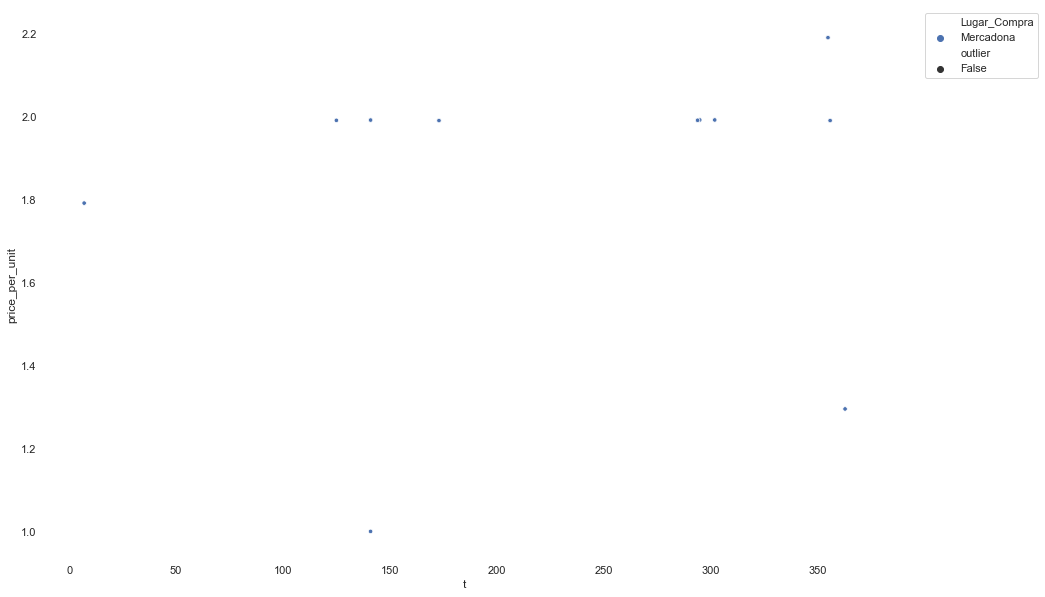

In [205]:
marker_size=20
ax = sns.scatterplot(data=single_product_sales_df, x="t", y="price_per_unit",hue='Lugar_Compra', style="outlier",s=marker_size)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(figure_dir+f'{prod_name}_prices_per_units_{year}_o_per_code.png',bbox_inches='tight')

In [145]:
# seems like lot of NANs 
df_test_products['X902_Tipo_Producto'].head()

0    LECHE
1     TORO
2      nan
3      nan
4      nan
Name: X902_Tipo_Producto, dtype: object

In [146]:
df_test_products['VF'].head()


0    LECHE LARGA CONSERVACION
1             V.C.D. ESPAÑOLA
2    FRUTA FRESCA A PESO (CB)
3    FRUTA FRESCA A PESO (CB)
4    FRUTA FRESCA A PESO (CB)
Name: VF, dtype: object

In [148]:
# 140 000 different product
df_test_products['CodProducto'].unique()

array([791031, 675179, 204305, ..., 800598, 369127,   6818], dtype=int32)

In [147]:
# only 350 VF
df_test_products['VF'].unique()


array(['LECHE LARGA CONSERVACION', 'V.C.D. ESPAÑOLA',
       'FRUTA FRESCA A PESO (CB)', 'FRUTA Y VERDURA  FRESCA',
       'FRUTA FRESCA POR PIEZAS (CB)', 'NATA/CREMA FRESCA',
       'QUESO FUNDIDO', 'PLATOS COCINADOS CONGELADOS', 'CARNE FRESCA',
       'CERDO (CB)', 'SALCHICHON', 'POLLO (CB)', 'PAVO (CB)',
       '4ª Y 5ª GAMA/VERDURA DESHIDRAT', 'VERDUR Y HORTAL FRESC A P (CB)',
       'CAFE SOLUBLE', 'YOGHOURTS', 'CALDOS CONCENTRADOS',
       'TOMATE NATURAL EN CONSERVA', 'PAN MOLDE/BURGUER/HOT DOG.....',
       'PIMIENTOS CONSERVA LATA/VIDRIO', 'JAMON CURADO DE CERDO',
       'PROD.PRELAVADO/ADITIVO GR/ML', 'QUESO RALLADO', 'ACEITUNAS',
       'FETA BRGOS MATO MSCRPN', 'QUESO FRESCO PARA UNTAR',
       'BLOQUE/TARTA HELADO DIVIDIR', 'CERVEZA(CON&SIN ALC)',
       'BACON/PANCETA SECC.FRESCA', 'CHOCO FUNDIR/COBERT/CARAM.LIQD',
       'AGUA SIN GAS', 'COMPLEMENTOS LAVAVAJILLAS', 'MANTEQUILLA',
       'PESCD/MAR. SIN PREP. CONGEL', 'BEB.ISTONC-BIO-C/LECH-C/VITAMN',
       'MAIZ CONSERV

## not very promising, so try to do some grouping...

In [206]:
place_and_product_df = df[['CodProducto','Canal','promo']].drop_duplicates()

# use VF instead of particular product
place_and_product_df=place_and_product_df.merge(df_test_products[['CodProducto','VF']])

# we will do first single product and channel outlier detection
setup_df = place_and_product_df[['promo','VF']].iloc[[0]]
# keeping the interesting rows only
single_product_sales_df = df.merge(setup_df)
# computing average price per unit 
single_product_sales_df['price_per_unit']= single_product_sales_df['Precio']/single_product_sales_df['Cantidad']
# computing average price per unit 
single_product_sales_df['price_per_unit'] = single_product_sales_df['Precio'] / single_product_sales_df['Cantidad']

single_product_sales_df['t'] = single_product_sales_df['FechaCesta'].astype('datetime64').dt.dayofyear


In [207]:
setup_df.columns

Index(['promo', 'VF'], dtype='object')

In [208]:
setup_df

,promo,VF
0,0,CABRITO/CORD/OTR OVINO-CA (CB)


In [209]:
prod_name = prod_data.iloc[0]['VF'].replace('/','_')

In [210]:
single_product_sales_df[['predicted', 'z', 'outlier']] = single_product_sales_df.groupby('VF')[
    ['t', 'price_per_unit']].apply(model_simple).reset_index().set_index('level_1').drop('VF', axis=1)


In [211]:
prod_vf=single_product_sales_df['VF'].unique()

In [212]:
prod_name=prod_vf[0].replace('/','_')

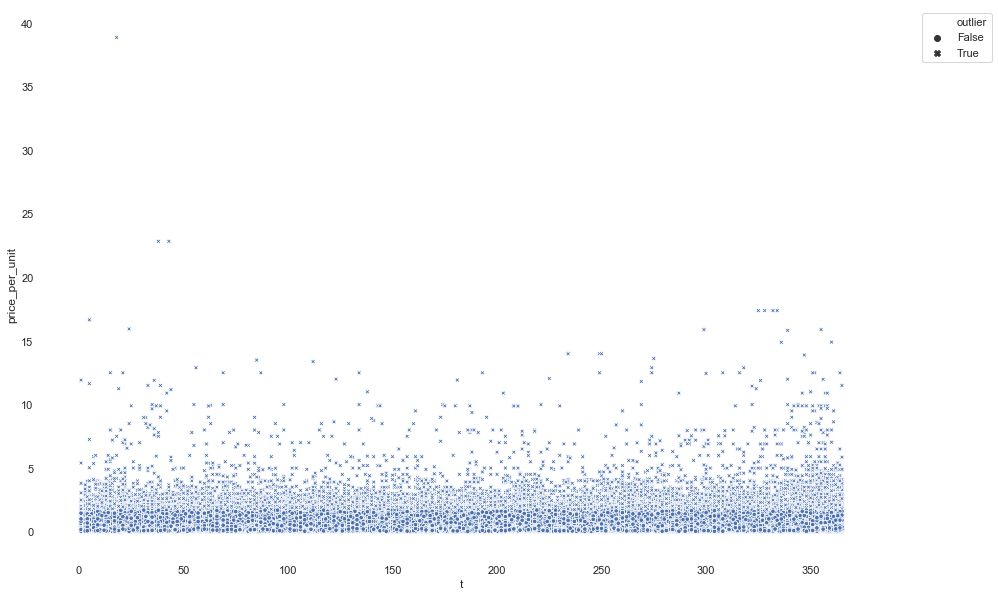

In [213]:
marker_size=20
ax = sns.scatterplot(data=single_product_sales_df, x="t", y="price_per_unit", style="outlier",s=marker_size)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(figure_dir+f'{prod_name}_prices_per_units_{year}_o_per_VF.png',bbox_inches='tight')

In [188]:
# not the best, so need something else...

In [189]:
df_test_products['X66_Preferred_Unit_Measure'].unique()

array([1500,  750,    1, ...,  962,  821,  199], dtype=int32)

In [214]:
place_and_product_df = df[['CodProducto','Canal','promo']].drop_duplicates()

# use VF instead of particular product
place_and_product_df=place_and_product_df.merge(df_test_products[['CodProducto','VF','X66_Preferred_Unit_Measure']])

# we will do first single product and channel outlier detection
setup_df = place_and_product_df[['promo','VF','X66_Preferred_Unit_Measure']].iloc[[0]]
# keeping the interesting rows only
single_product_sales_df = df.merge(setup_df)
# computing average price per unit 
single_product_sales_df['price_per_unit']= single_product_sales_df['Precio']/single_product_sales_df['Cantidad']
# computing average price per unit 
single_product_sales_df['price_per_unit'] = single_product_sales_df['Precio'] / single_product_sales_df['Cantidad']

single_product_sales_df['t'] = single_product_sales_df['FechaCesta'].astype('datetime64').dt.dayofyear


In [215]:

single_product_sales_df.groupby(['VF','X66_Preferred_Unit_Measure']).size()

VF                              X66_Preferred_Unit_Measure
CABRITO/CORD/OTR OVINO-CA (CB)  1                             987814
dtype: int64

In [216]:
single_product_sales_df[['predicted', 'z', 'outlier']] = single_product_sales_df.groupby('VF')[
    ['t', 'price_per_unit']].apply(model_simple).reset_index().set_index('level_1').drop('VF', axis=1)


In [217]:
prod_name = prod_data.iloc[0]['VF'].replace('/','_')


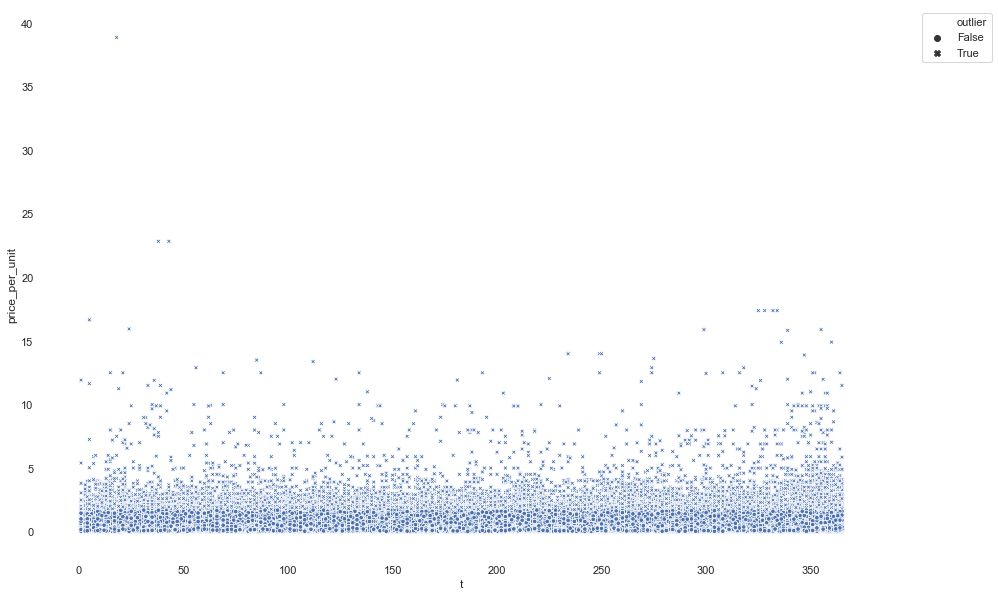

In [218]:
marker_size=20
ax = sns.scatterplot(data=single_product_sales_df, x="t", y="price_per_unit", style="outlier",s=marker_size)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(figure_dir+f'{prod_name}_prices_per_units_{year}_o_per_VF_u.png',bbox_inches='tight')

In [241]:
single_product_sales_df.head()

,level_0,index,idCompra,CodPanelista,CodProducto,FechaCesta,PrecioCompra,Cantidad,Precio,CodLugarCompra,...,Lugar_Compra,Canal,_0,VF,X66_Preferred_Unit_Measure,price_per_unit,t,predicted,z,outlier
0,0,182,193457106,30109,465111,2022-12-29,10719,1007,1304,79,...,Mercadona,SUPER+AUTOS,12,CABRITO/CORD/OTR OVINO-CA (CB),1,1.294935,363,0.370787,2.087985,False
1,1,397308,186212434,82524,465111,2022-05-05,4090,500,995,79,...,Mercadona,SUPER+AUTOS,12,CABRITO/CORD/OTR OVINO-CA (CB),1,1.990000,125,0.370787,3.658387,True
2,2,533738,192983604,113539,465111,2022-12-22,3234,1145,2278,79,...,Mercadona,SUPER+AUTOS,12,CABRITO/CORD/OTR OVINO-CA (CB),1,1.989520,356,0.370787,3.657302,True
3,3,4820379,187979200,141968,465111,2022-06-22,3975,475,945,79,...,Mercadona,SUPER+AUTOS,12,CABRITO/CORD/OTR OVINO-CA (CB),1,1.989474,173,0.370787,3.657198,True
4,4,4949504,182713606,163330,465111,2022-01-07,3941,535,958,79,...,Mercadona,SUPER+AUTOS,12,CABRITO/CORD/OTR OVINO-CA (CB),1,1.790654,7,0.370787,3.207993,True


# running all

In [15]:
transaction_limits = [1, 20, 100, 1500, np.inf]
intervals = list(zip(transaction_limits[:-1], transaction_limits[1:]))
dfs={}

In [48]:

t=intervals[-1]
for t in intervals[1:]:
    dfs[t] = pd.read_stata(data_dir + get_name(year, 'raw', t))


In [17]:
# For putting back answer: 
# https://stackoverflow.com/questions/68555285/typeerror-incompatible-index-of-inserted-column-with-frame-index-when-applying

def per_canal_polynomial_detection(df):
    # transform date
    df['t'] = df['FechaCesta'].astype('datetime64').dt.dayofyear
    # calculate price per unit of sales
    df['price_per_unit']= df['Precio']/df['Cantidad']
    #a=df.groupby(['CodProducto','Canal'])
    #print(a.indices)
   
    x=  df.groupby(['CodProducto','Canal'])[['t', 'price_per_unit']].apply(model_poly).reset_index().set_index('level_2').drop(['CodProducto','Canal'],axis=1)
    df[['predicted', 'z', 'outlier']] = x
    '''
    df[['predicted', 'z', 'outlier']] =  df.groupby(['CodProducto','Canal'],group_keys=False)[['t', 'price_per_unit']].apply(model_poly)
    '''
    
    return df
    # #.reset_index().set_index('level_0').drop(['CodProducto','Canal'], axis=1)
    #return df
    



NameError: name 'dfs' is not defined

In [ ]:

for t in intervals[1:]:
    df= dfs[(t[0],t[1])]
    df=per_canal_polynomial_detection(df)
    df['outlier_detection']="canal_poly"
    df=df.drop('level_0',axis=1)
    df= df.reset_index(drop=True)
    df.to_stata(data_dir+get_name(year,'o',t))
    #del df

In [50]:
for t in intervals[1:]:
    del dfs[t]
    

In [51]:
t=intervals[0]

In [52]:
dfs[t] = pd.read_stata(data_dir + get_name(year, 'raw', t))

In [60]:

def per_product_group_preferred_quantity_simple_detection(df):
    # transform date
    df=df.merge(df_test_products[['CodProducto','VF','X66_Preferred_Unit_Measure']])
    df['t'] = df['FechaCesta'].astype('datetime64').dt.dayofyear
    # calculate price per unit of sales
    df['price_per_unit']= df['Precio']/df['Cantidad']
    #a=df.groupby(['CodProducto','Canal'])
    #print(a.indices)
    
    x = df.groupby(['VF','X66_Preferred_Unit_Measure'])[
    ['t', 'price_per_unit']].apply(model_simple).reset_index().set_index('level_2').drop(['VF','X66_Preferred_Unit_Measure'], axis=1)
   
    df[['predicted', 'z', 'outlier']] = x
   
    
    return df



In [63]:
df= dfs[(t[0],t[1])]



df=per_product_group_preferred_quantity_simple_detection(df)
df['outlier_detection']="vf_unit_simple"
df=df.drop('level_0',axis=1)
df= df.reset_index(drop=True)
df.to_stata(data_dir+get_name(year,'o',t))

#

/Users/peterkiss/anaconda3/envs/kantar_data_env/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [58]:
df.merge(df_test_products[['CodProducto','VF','X66_Preferred_Unit_Measure']])

,level_0,index,idCompra,CodPanelista,CodProducto,FechaCesta,PrecioCompra,Cantidad,Precio,CodLugarCompra,...,Promo_Envase,Promo_TPR,promo,Lugar_Compra,Canal,_0,t,price_per_unit,VF,X66_Preferred_Unit_Measure
0,0,182,193457106,30109,465111,2022-12-29,10719,1007,1304,79,...,0,0,0,Mercadona,SUPER+AUTOS,12,363,1.294935,CABRITO/CORD/OTR OVINO-CA (CB),1
1,1,397308,186212434,82524,465111,2022-05-05,4090,500,995,79,...,0,0,0,Mercadona,SUPER+AUTOS,12,125,1.990000,CABRITO/CORD/OTR OVINO-CA (CB),1
2,2,533738,192983604,113539,465111,2022-12-22,3234,1145,2278,79,...,0,0,0,Mercadona,SUPER+AUTOS,12,356,1.989520,CABRITO/CORD/OTR OVINO-CA (CB),1
3,3,4820379,187979200,141968,465111,2022-06-22,3975,475,945,79,...,0,0,0,Mercadona,SUPER+AUTOS,12,173,1.989474,CABRITO/CORD/OTR OVINO-CA (CB),1
4,4,4949504,182713606,163330,465111,2022-01-07,3941,535,958,79,...,0,0,0,Mercadona,SUPER+AUTOS,12,7,1.790654,CABRITO/CORD/OTR OVINO-CA (CB),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242806,1242648,4680468,186680999,112713,844000,2022-05-30,10714,2000,720,480,...,0,0,0,Super Amara Por Internet,INTERNET,1,150,0.360000,CROQUETA/EMPANADILLA CONGEL,350
1242807,1242715,5784971,182992835,170686,157435,2022-02-26,2950,215,315,41,...,0,0,0,EISMANN,VTA.DOMICILIO+CATALOGO,1,57,1.465116,OTROS QUESOS (CB),1
1242808,1242741,6528675,186627191,239024,190458,2022-06-15,6500,2000,520,440,...,0,0,0,Piedra Por Internet,INTERNET,3,166,0.260000,ACEITE DE OLIVA,1000
1242809,1242742,6528676,185401154,239024,190458,2022-04-21,6500,1000,260,440,...,0,0,0,Piedra Por Internet,INTERNET,3,111,0.260000,ACEITE DE OLIVA,1000


In [64]:
df.columns

Index(['index', 'idCompra', 'CodPanelista', 'CodProducto', 'FechaCesta',
       'PrecioCompra', 'Cantidad', 'Precio', 'CodLugarCompra', 'TipoMaquina',
       'Promo_Folleto', 'Promo_Envase', 'Promo_TPR', 'promo', 'Lugar_Compra',
       'Canal', '_0', 't', 'price_per_unit', 'VF',
       'X66_Preferred_Unit_Measure', 'predicted', 'z', 'outlier',
       'outlier_detection'],
      dtype='object')